In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

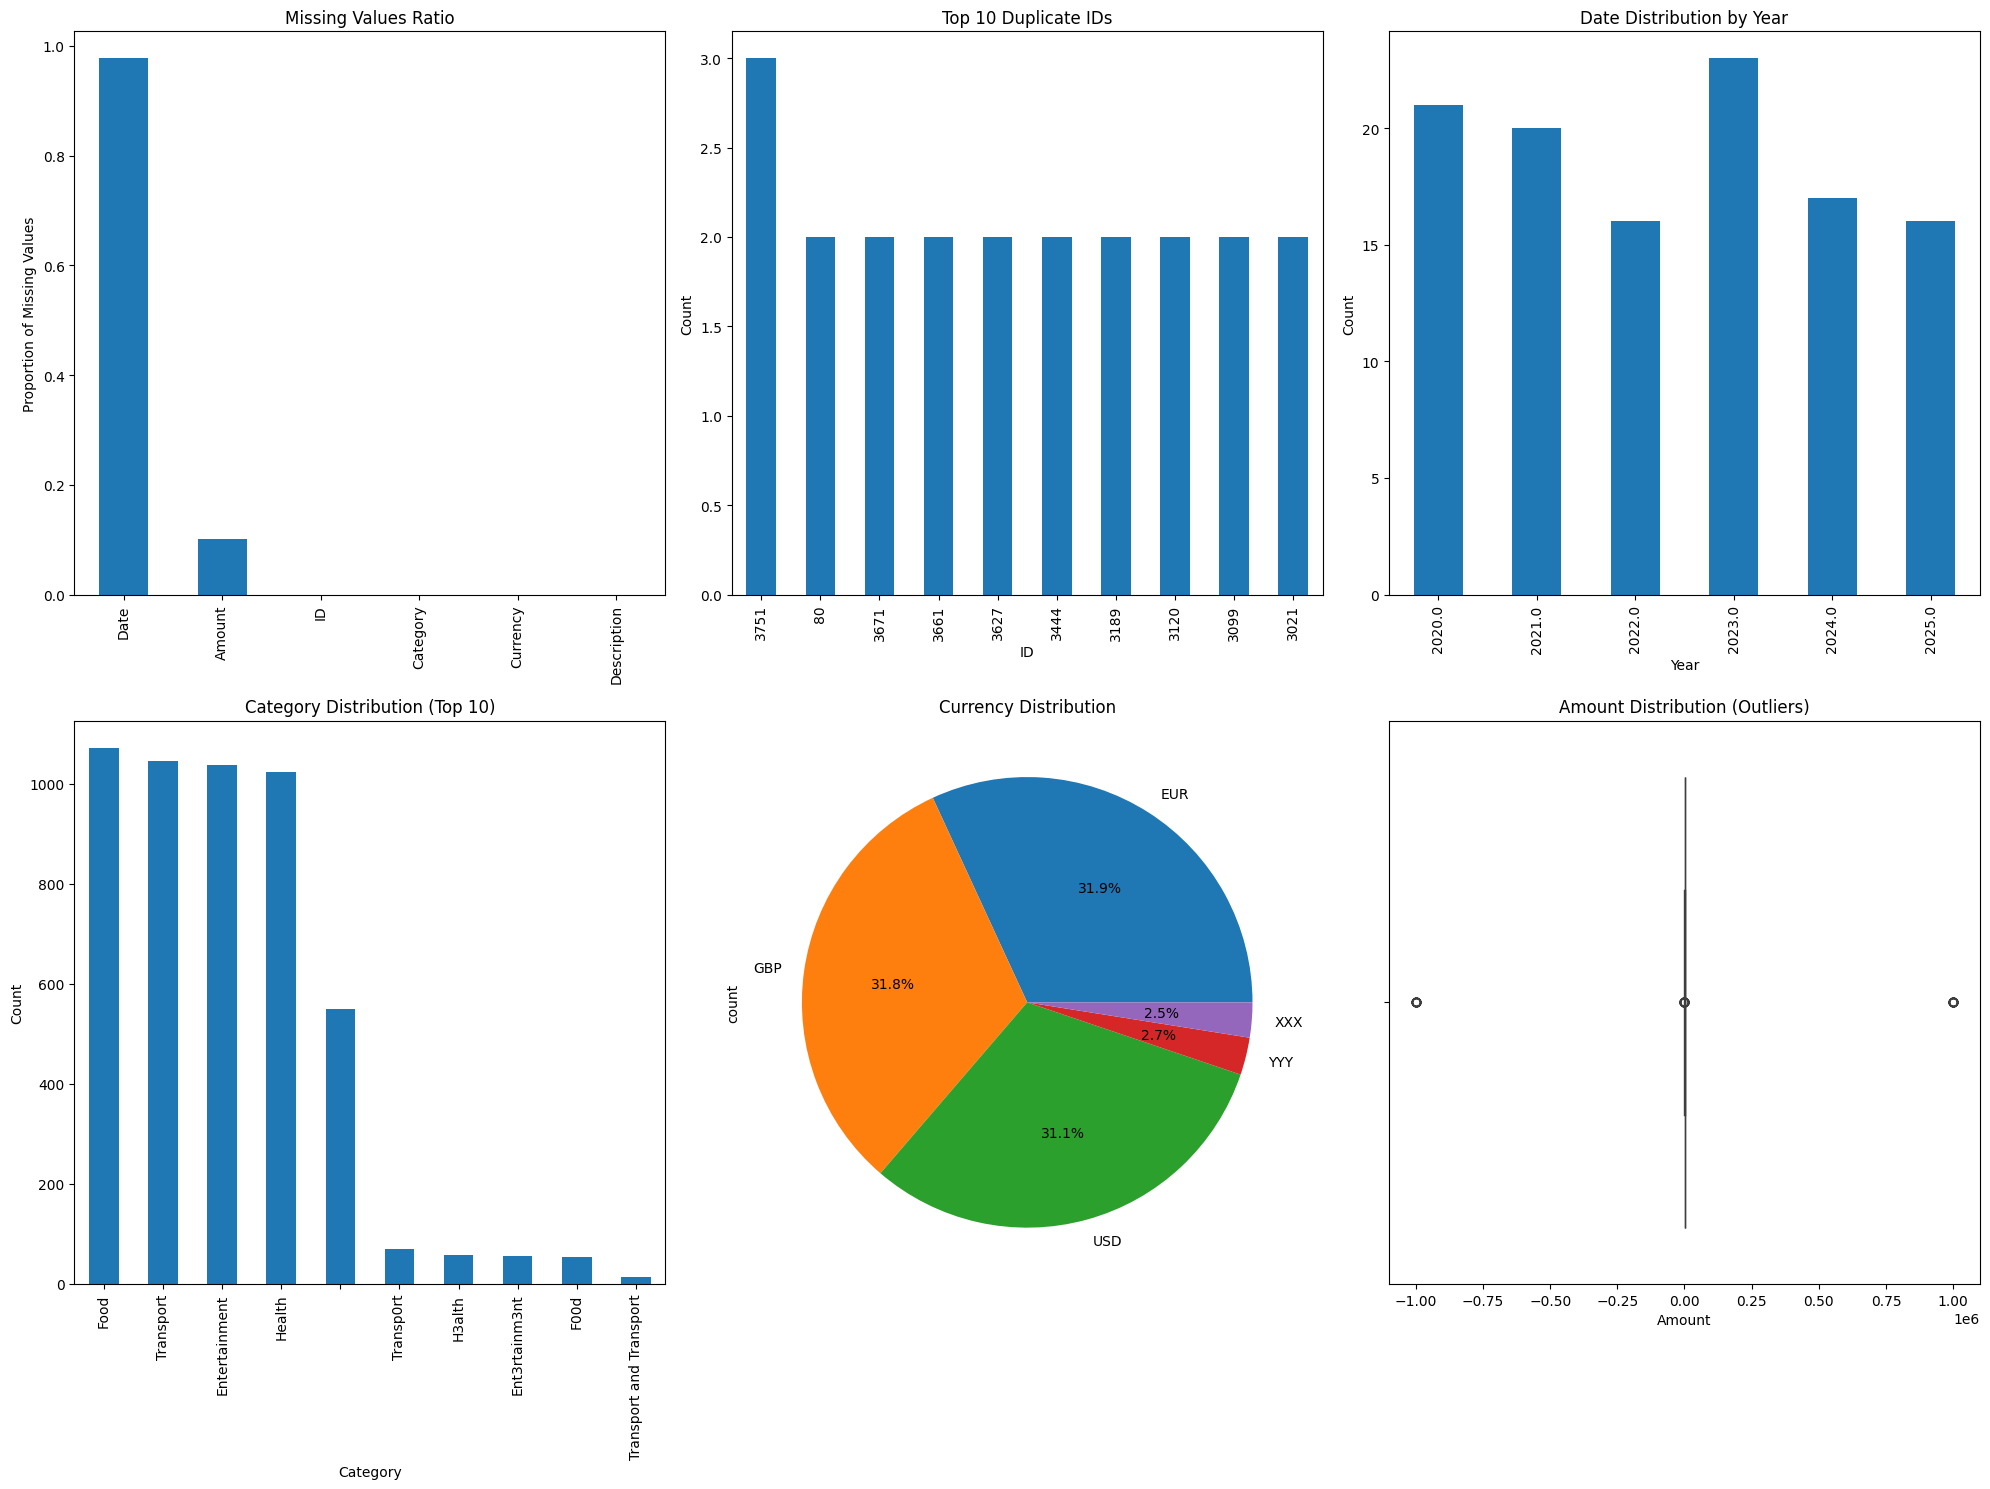

In [2]:
def create_enhanced_poor_quality_data(n=5000):
    data = {
        'ID': list(range(n)),  # Unique identifier
        'Date': [],
        'Amount': [],
        'Category': [],
        'Currency': [],
        'Description': []
    }

    categories = ['Food', 'Transport', 'Entertainment', 'Health']
    currencies = ['USD', 'EUR', 'GBP']
    current_year = datetime.now().year

    for i in range(n):
        # Date with inconsistent formats and outdated information
        if random.random() < 0.2:
            date = np.random.choice(['01/01/2023', '2023-01-01', 'Jan 01, 2023'])
        else:
            date = datetime(current_year - random.randint(0, 5), random.randint(1, 12), random.randint(1, 28))  # Some outdated dates
            date = date.strftime(random.choice(['%m/%d/%Y', '%Y-%m-%d', '%b %d, %Y']))
        
        # Amount with inaccuracies, missing values, and extreme values
        if random.random() < 0.1:
            amount = np.nan  # Missing value
        else:
            amount = round(random.uniform(0, 1000), 2)
            if random.random() < 0.05:  # Introduce inaccuracies
                amount *= random.choice([-1, 1.5, 0.5])
            if random.random() < 0.01:  # Extreme values for bias
                amount = random.choice([1000000, -1000000])
        
        # Category with typos, missing entries, and ambiguity
        if random.random() < 0.1:
            category = ''  # Missing category
        else:
            category = random.choice(categories)
            if random.random() < 0.05:  # Introduce typos
                category = category.replace('o', '0').replace('e', '3')
            if random.random() < 0.03:  # Ambiguity - mixed categories
                category += ' and ' + random.choice(categories)
        
        # Currency with inconsistencies
        currency = random.choice(currencies)
        if random.random() < 0.05:
            currency = random.choice(['XXX', 'YYY'])  # Unknown or incorrect currency
        
        # Description with data entry errors and lack of uniformity
        if random.random() < 0.1:
            description = ''  # Missing description
        else:
            description = f"Purchase of {category.lower()} item in {random.choice(['New York', 'London', 'Tokyo'])}"
            if random.random() < 0.05:  # Introduce typographical errors
                description = description.replace('e', '3').replace('o', '0')
            if random.random() < 0.05:  # Lack of uniformity in capitalization
                description = description.upper()
        
        data['Date'].append(date)
        data['Amount'].append(amount)
        data['Category'].append(category)
        data['Currency'].append(currency)
        data['Description'].append(description)

    # Introduce duplicates and data integrity issues
    for _ in range(100):
        idx = random.randint(0, n-1)
        data['ID'].append(data['ID'][idx])  # Duplicate ID
        data['Date'].append(data['Date'][idx])
        data['Amount'].append(data['Amount'][idx])
        data['Category'].append(data['Category'][idx])
        data['Currency'].append(data['Currency'][idx])
        data['Description'].append(data['Description'][idx])

    return pd.DataFrame(data)

df = create_enhanced_poor_quality_data()
# Ensure all date entries are Python strings
df['Date'] = df['Date'].apply(lambda x: str(x))

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create a single figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# 1. Missing Values
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Missing Values Ratio')
axes[0, 0].set_ylabel('Proportion of Missing Values')

# 2. Duplicates
duplicates = df[df.duplicated(subset='ID', keep=False)]
duplicates['ID'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Duplicate IDs')
axes[0, 1].set_xlabel('ID')
axes[0, 1].set_ylabel('Count')

# 3. Date Distribution by Year
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Date Distribution by Year')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Count')

# 4. Category Distribution
df['Category'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Category Distribution (Top 10)')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')

# 5. Currency Distribution
df['Currency'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Currency Distribution')

# 6. Amount Distribution (Outliers)
sns.boxplot(x=df['Amount'], ax=axes[1, 2])
axes[1, 2].set_title('Amount Distribution (Outliers)')
axes[1, 2].set_xlabel('Amount')


print("Explanation of Issues:")
print("1- **Missing Values**: Look at the bar chart where higher bars indicate more missing data.")
print("2- **Duplicates**: The bar chart shows IDs that appear more than once.")
print("3- **Inconsistent Dates**: Notice dates from different years, including potentially outdated information.")
print("4- **Category Issues**: Categories with low counts might indicate typos or rare categories.")
print("5- **Currency Issues**: Pie chart shows unexpected currencies.")
print("6- **Amount Anomalies**: Boxplot highlights outliers or extreme values.")
print("7- **Description Issues**: Histogram of lengths shows uniformity problems; check for typos in text.")
print("8- **Bias**: Histogram of amounts might show skewness due to extreme values.")
print("9- **Data Integrity**: IDs should be unique; the histogram shows how often IDs repeat.")
# Adjust layout
plt.tight_layout()
plt.show()


